In [3]:
pip install scikit-learn

In [7]:
import pandas as pd

In [15]:
data = pd.read_csv("Mobiles Dataset.csv")
data.head(20)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
5,Apple,iPhone 16 Plus 512GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 274,999","INR 104,999","CNY 6,999",USD 999,"AED 3,599",2024
6,Apple,iPhone 16 Pro 128GB,206g,6GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 284,999","INR 99,999","CNY 6,999",USD 999,"AED 3,499",2024
7,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 294,999","INR 104,999","CNY 7,099","USD 1,049","AED 3,699",2024
8,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 314,999","INR 114,999","CNY 7,499","USD 1,099","AED 3,899",2024
9,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,"PKR 314,999","INR 109,999","CNY 7,499","USD 1,099","AED 3,799",2024


In [13]:
features = data.drop(['Company Name', 'Model Name', 'Launched Price (India)'], axis=1)
target = data['Launched Price (India)'] 

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()
for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

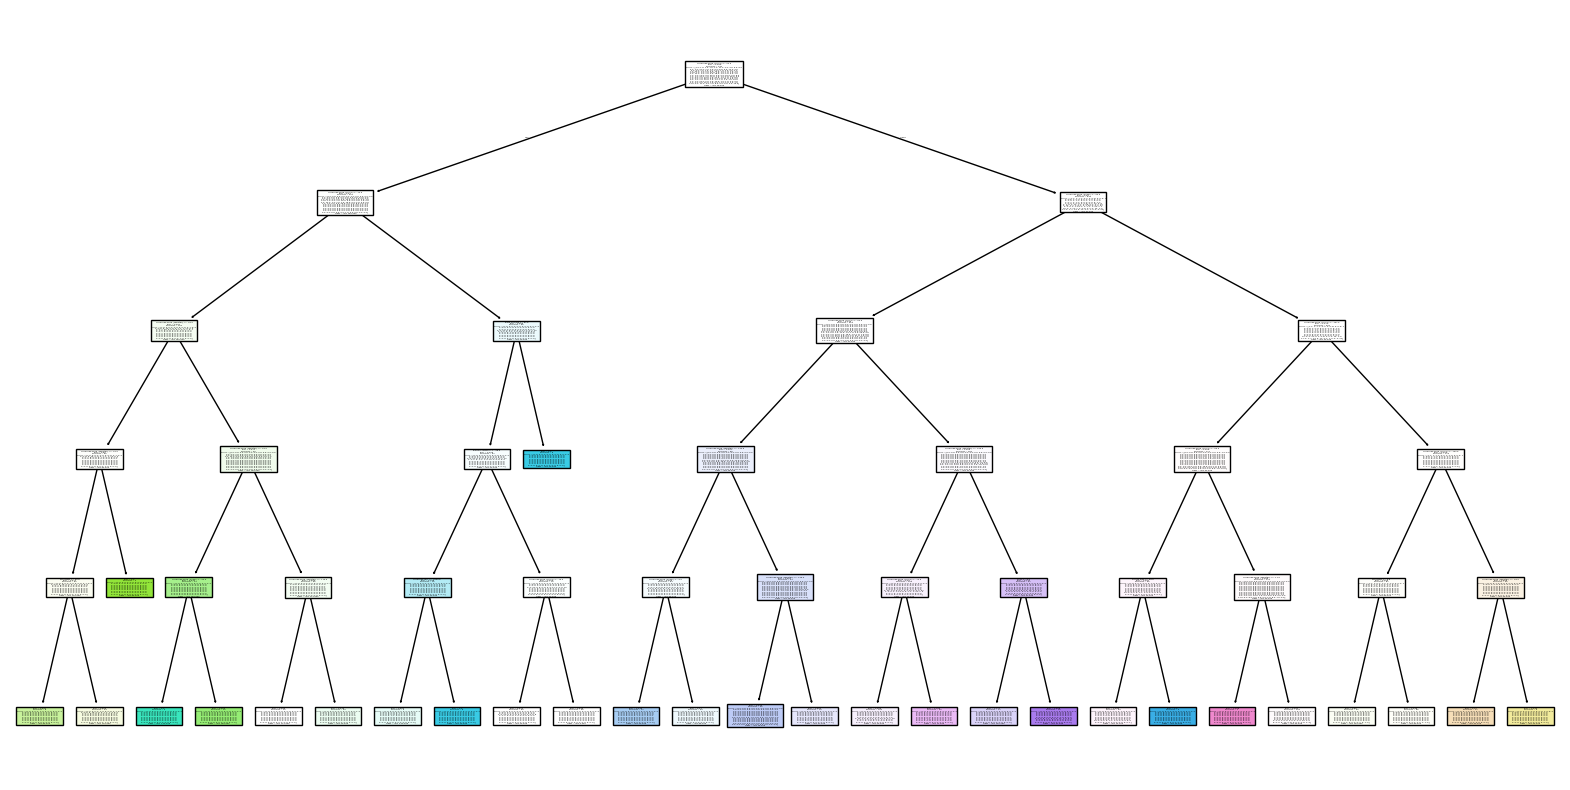

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features.columns, class_names=target.unique(), filled=True)
plt.show()


In [32]:
data['Launched Price (India)'] = data['Launched Price (India)'].replace({'INR ': '', ',': ''}, regex=True).astype(float)

# Group by 'Launched Year' and calculate average launched price
average_price_per_year = data.groupby('Launched Year')['Launched Price (India)'].mean()


In [38]:
#DATA VISUALIZATION

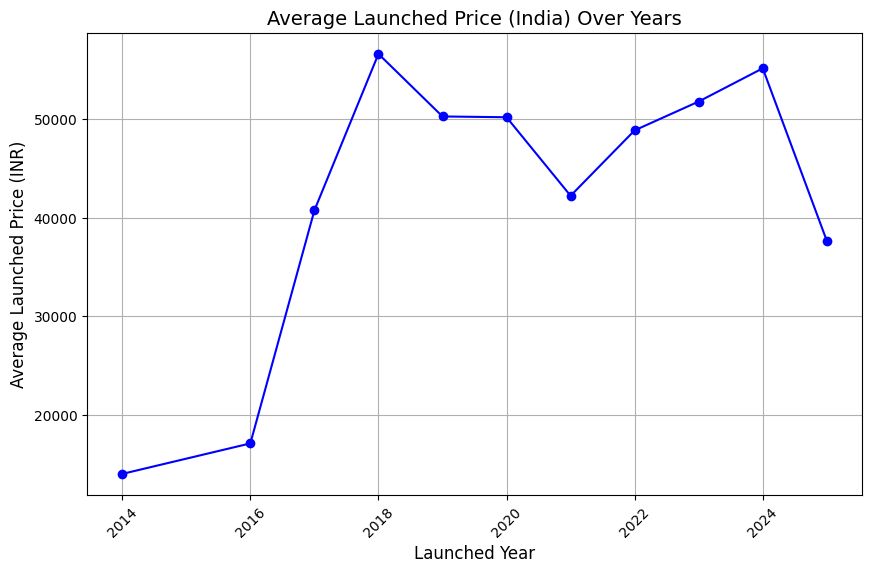

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Launched Price (India) Over Years', fontsize=14)
plt.xlabel('Launched Year', fontsize=12)
plt.ylabel('Average Launched Price (INR)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 17.74%
Classification Report:
              precision    recall  f1-score   support

  INR 10,499       0.00      0.00      0.00         1
  INR 10,999       0.00      0.00      0.00         4
 INR 104,900       0.00      0.00      0.00         1
 INR 104,999       0.00      0.00      0.00         1
 INR 109,900       0.00      0.00      0.00         2
 INR 109,999       0.00      0.00      0.00         4
  INR 11,999       0.33      0.33      0.33         3
 INR 119,900       0.00      0.00      0.00         3
 INR 119,999       0.12      0.67      0.21         3
  INR 12,499       0.00      0.00      0.00         1
  INR 12,999       0.22      0.50      0.31         4
 INR 124,999       0.00      0.00      0.00         1
 INR 129,900       0.00      0.00      0.00         1
 INR 129,999       0.00      0.00      0.00         3
  INR 13,999       0.00      0.00      0.00         4
 INR 134,999       0.00      0.00      0.00         1
 INR 139,900       0.00      0.00      0.

C:\Users\aishw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aishw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aishw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aishw\anaconda3\Lib\site-packages\sklea